In [1]:
"""
@Author: yangwenhao
@Contact: 874681044@qq.com
@Software: PyCharm
@File: grad_gfa.py
@Time: 2022/8/16 12.31
@Overview:
"""
import argparse
import pathlib
import pickle
import random
import json

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
from python_speech_features import mel2hz
from scipy import interpolate

%matplotlib inline

In [2]:
spk_dir = '/Users/yang/PycharmProjects/SpeakerVerification-pytorch'

In [41]:
grads = []
for s in [123456, 123457, 123458]:
    with open(spk_dir + '/Data/Data/gradient/ThinResNet34/vox1/klsp_egs_rvec_mean/arcsoft_sgd_rop/%s/freq.data.pickle'%s, 'rb') as f:
        fre = pickle.load(f)
        grad = fre['train.time.mean']
        grad /= grad.sum()
        grads.append(grad)

grads = np.array(grads)
grad = grads.mean(axis=0)

grad /= grad.sum()

grads_max = []
for s in [123456, 123457, 123458]:
    with open(spk_dir + '/Data/Data/gradient/ThinResNet34/vox1/klsp_egs_rvec_max/%s/gradient/freq.data.pickle'%s, 'rb') as f:
        fre = pickle.load(f)
        grad_max = fre['train.time.mean']
        grad_max /= grad_max.sum()
        grads_max.append(grad_max)

grads_max = np.array(grads_max)
grad_max = grads_max.mean(axis=0)
grad_max /= grad_max.sum()

In [40]:
grad_cams = []
for s in [123456, 123457, 123458]:
    ingrad = np.load(spk_dir + '/Data/Data/gradient/ThinResNet34/vox1/klsp_egs_rvec_mean/grad_cam/%s/train.grad.npy'%s)
    ingrad /= ingrad.sum()
    grad_cams.append(ingrad)

grad_cams = np.array(grad_cams)
grad_cam = grad_cams.mean(axis=0)
grad_cam /= grad_cam.sum()

grad_cams_max = []
for s in [123456, 123457, 123458]:
    ingrad_max = np.load(spk_dir + '/Data/Data/gradient/ThinResNet34/vox1/klsp_egs_rvec_max/%s/grad_cam/train.grad.npy'%s)
    ingrad_max /= ingrad_max.sum()
    grad_cams_max.append(ingrad_max)

grad_cams_max = np.array(grad_cams_max)
grad_cam_max = grad_cams_max.mean(axis=0)
grad_cam_max /= grad_cam_max.sum()

In [42]:
ingrads = []
for s in [123456, 123457, 123458]:
    ingrad = np.load(spk_dir + '/Data/Data/gradient/ThinResNet34/vox1/klsp_egs_rvec_mean/integrad/%s/train.grad.npy'%s)
    ingrad /= ingrad.sum()
    ingrads.append(ingrad)

ingrads = np.array(ingrads)
ingrad = ingrads.mean(axis=0)
ingrad /= ingrad.sum()

ingrads_max = []
for s in [123456, 123457, 123458]:
    ingrad_max = np.load(spk_dir + '/Data/Data/gradient/ThinResNet34/vox1/klsp_egs_rvec_max/%s/integrad/train.grad.npy'%s)
    ingrad_max /= ingrad_max.sum()
    ingrads_max.append(ingrad_max)

ingrads_max = np.array(ingrads_max)
ingrad_max = ingrads_max.mean(axis=0)
ingrad_max /= ingrad_max.sum()

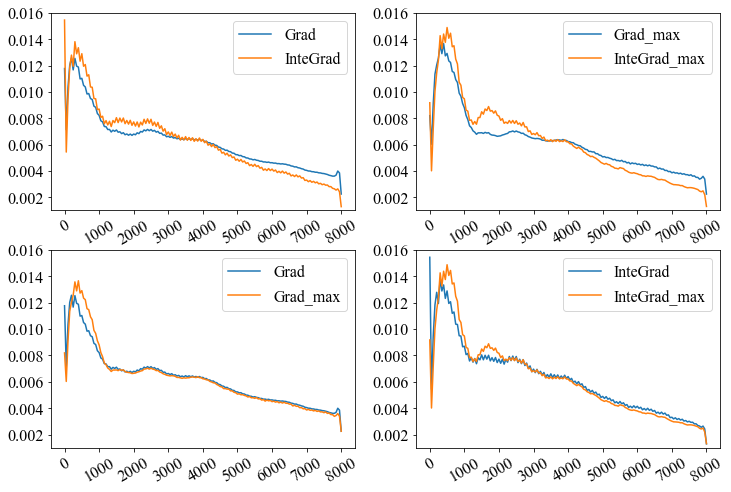

In [8]:
plt.figure(figsize=(12, 8))
plt.rc('font', family='Times New Roman')
# plt.title('Gradient Distributions', fontsize=22)
plt.xlabel('Frequency (Hz)', fontsize=24)
plt.ylabel('Weight', fontsize=24)

xnew = np.linspace(0, 8000, 161)

ax = plt.subplot(2, 2, 1)
# ax.set_title('(a)', fontsize=16)
plt.xticks(fontsize=16, rotation=30)
plt.yticks(fontsize=16)

plt.plot(xnew, grad)
plt.plot(xnew, ingrad)
plt.ylim(0.001, 0.016)

plt.legend(['Grad', 'InteGrad'], fontsize=16)

ax = plt.subplot(2, 2, 2)
# ax.set_title('(b)', fontsize=16)
plt.xticks(fontsize=16, rotation=30)
plt.yticks(fontsize=16)

plt.plot(xnew, grad_max)
plt.plot(xnew, ingrad_max)
plt.ylim(0.001, 0.016)

plt.legend(['Grad_max', 'InteGrad_max'], fontsize=16)


ax = plt.subplot(2, 2, 3)
# ax.set_title('(c)', fontsize=16)
plt.xticks(fontsize=16, rotation=30)
plt.yticks(fontsize=16)

plt.plot(xnew, grad)
plt.plot(xnew, grad_max)
plt.ylim(0.001, 0.016)

plt.legend(['Grad', 'Grad_max'], fontsize=16)

ax = plt.subplot(2, 2, 4)
# ax.set_title('(d)', fontsize=16)
plt.xticks(fontsize=16, rotation=30)
plt.yticks(fontsize=16)

plt.plot(xnew, ingrad)
plt.plot(xnew, ingrad_max)
plt.ylim(0.001, 0.016)

plt.legend(['InteGrad', 'InteGrad_max'], fontsize=16)

In [52]:
grad_max/grad_max.max()

array([0.59942287, 0.44100699, 0.6654895 , 0.83038158, 0.88043534,
       0.91940396, 0.99373492, 0.94381532, 1.        , 0.93153523,
       0.9451054 , 0.90356343, 0.89501567, 0.84504528, 0.83935457,
       0.80008309, 0.78366854, 0.7246613 , 0.7076998 , 0.66689951,
       0.64384488, 0.6009433 , 0.57796739, 0.54334198, 0.53372165,
       0.51540845, 0.50796099, 0.49624921, 0.50428188, 0.50411665,
       0.50497502, 0.50090922, 0.50683952, 0.50299504, 0.50530798,
       0.49585957, 0.4918022 , 0.49104479, 0.48881043, 0.48496855,
       0.48607913, 0.48767272, 0.49222078, 0.49475245, 0.4986363 ,
       0.50103115, 0.50969059, 0.51060226, 0.51470217, 0.50928459,
       0.51434669, 0.50952897, 0.5073258 , 0.50115022, 0.50209226,
       0.49354752, 0.4902978 , 0.48347509, 0.48038568, 0.47557216,
       0.47358771, 0.47181753, 0.47308705, 0.47201649, 0.4693737 ,
       0.46323121, 0.46342407, 0.46116291, 0.45829557, 0.4612174 ,
       0.45927315, 0.46126656, 0.4614168 , 0.46448485, 0.46575

In [53]:
grad/grad.max()

array([0.93666978, 0.56726488, 0.8222816 , 0.9569513 , 1.        ,
       0.92841555, 0.99788855, 0.95108182, 0.94570929, 0.87398932,
       0.87759551, 0.83535572, 0.8254884 , 0.78303527, 0.78572739,
       0.75566424, 0.74970352, 0.70954212, 0.70254955, 0.66491535,
       0.65384518, 0.62119538, 0.61444848, 0.58685738, 0.58541611,
       0.5683864 , 0.56902896, 0.55355778, 0.56454473, 0.5578065 ,
       0.56573297, 0.55227652, 0.55500023, 0.54365246, 0.54920018,
       0.53692163, 0.54168009, 0.53398901, 0.54092565, 0.53312182,
       0.54120633, 0.5367829 , 0.54853514, 0.54364832, 0.55674789,
       0.55334951, 0.56606959, 0.56032946, 0.56916266, 0.56120338,
       0.56890126, 0.55832199, 0.56333224, 0.55263678, 0.55711248,
       0.54513609, 0.54694934, 0.53457215, 0.53611725, 0.52472994,
       0.52778886, 0.52103148, 0.52650292, 0.51667318, 0.52015775,
       0.51243619, 0.51619831, 0.50787546, 0.5125012 , 0.50676311,
       0.51427352, 0.50816192, 0.51345389, 0.50797012, 0.51278

In [10]:
rclean = np.array([0.92477932, 0.5604629, 0.81231512, 0.9452812, 0.9878581,
               0.91718447, 0.98578457, 0.93958167, 0.9342572, 0.86341224,
               0.8669048, 0.82521726, 0.81543249, 0.77351325, 0.77612315,
               0.74646756, 0.74053631, 0.70090535, 0.69396496, 0.65681766,
               0.64585229, 0.61364542, 0.60695567, 0.57972747, 0.57827236,
               0.56147617, 0.56209271, 0.54684939, 0.55766338, 0.55103616,
               0.55882534, 0.54556891, 0.54821263, 0.5370302, 0.54247303,
               0.53038922, 0.53505836, 0.52749734, 0.53431809, 0.52664831,
               0.53458374, 0.5302529, 0.54182448, 0.53704169, 0.54994165,
               0.54662498, 0.55914836, 0.55351546, 0.56219563, 0.55436604,
               0.56193454, 0.55152906, 0.55644016, 0.54592332, 0.55029831,
               0.5385054, 0.54024239, 0.52806396, 0.5295591, 0.51834856,
               0.52133787, 0.51470391, 0.52007646, 0.51039604, 0.51379619,
               0.5062057, 0.50989584, 0.50170962, 0.50624616, 0.50061787,
               0.50800645, 0.50200174, 0.5071854, 0.5018071, 0.50653239,
               0.50006285, 0.5035014, 0.49879962, 0.50328572, 0.49667013,
               0.49781779, 0.49012563, 0.49126571, 0.48288981, 0.48260163,
               0.47520772, 0.47686701, 0.46799574, 0.4665646, 0.45680765,
               0.45501194, 0.44659253, 0.44506847, 0.43717145, 0.43845108,
               0.43062891, 0.42931774, 0.42088952, 0.42005199, 0.41165075,
               0.41142122, 0.40588705, 0.40678989, 0.39977112, 0.3989484,
               0.39231466, 0.39162987, 0.3859916, 0.38534913, 0.38070587,
               0.38295839, 0.37837218, 0.37706756, 0.37232811, 0.37236685,
               0.36799689, 0.36836679, 0.36554998, 0.36731809, 0.36339302,
               0.36375577, 0.36090386, 0.36142272, 0.35796752, 0.35848641,
               0.35602788, 0.3572656, 0.35497309, 0.35434025, 0.35036567,
               0.34949903, 0.34429663, 0.34293335, 0.33836847, 0.33899405,
               0.33368611, 0.33206937, 0.32787669, 0.32567629, 0.31971206,
               0.31797035, 0.31416595, 0.31387143, 0.31014244, 0.30971302,
               0.30676398, 0.30668664, 0.30324463, 0.30263753, 0.2997949,
               0.29887927, 0.29598212, 0.29335763, 0.28886775, 0.28657532,
               0.28351943, 0.28345377, 0.28922869, 0.31397426, 0.3024402,
               0.17666571])

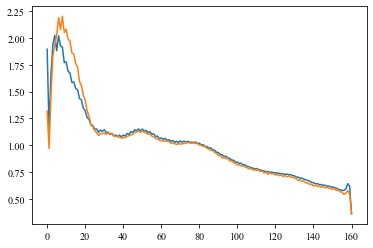

In [14]:
plt.plot(rclean/rclean.sum()*161)
plt.plot(grad_max/grad_max.sum()*161)


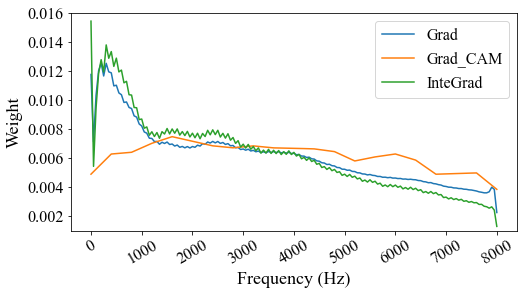

In [50]:
plt.figure(figsize=(8, 4))
plt.rc('font', family='Times New Roman')
# plt.title('Gradient Distributions', fontsize=22)
plt.xlabel('Frequency (Hz)', fontsize=18)
plt.ylabel('Weight', fontsize=18)

xnew = np.linspace(0, 8000, 161)

# ax = plt.subplot(2, 2, 1)
# ax.set_title('(a)', fontsize=16)
plt.xticks(fontsize=16, rotation=30)
plt.yticks(fontsize=16)

plt.plot(xnew, grad)
plt.plot(xnew, grad_cam)
plt.plot(xnew, ingrad)
plt.ylim(0.001, 0.016)

plt.legend(['Grad', 'Grad_CAM', 'InteGrad'], fontsize=16)
